## PROBLEM STATEMENT - IS PROJECT

In [1]:
# LET US START BY IMPORTING THE REQUIRED LIBRARIES
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline
import scipy.stats as stats  
from scipy.stats import norm
from scipy.stats import ttest_1samp,ttest_ind,t
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.stats.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Problem 1

### A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

1.1 What is the probability that a randomly chosen player would suffer an injury?

In [2]:
# Given values
Players_injured = 145 # Total number of injured players
Total_players = 235 # Total number of players
# Calculate the probability
probability_of_injury = Players_injured / Total_players
# Display the result
print(f'The probability that a randomly chosen player would suffer an injury is {probability_of_injury:.2f}')


The probability that a randomly chosen player would suffer an injury is 0.62


1.2 What is the probability that a player is a forward or a winger?

In [3]:
# Given values
forward_player = 94
winger_player = 29
Total_players = 235 # Total number of players
# Calculate the probability
probability_player_forward_or_winger = (forward_player + winger_player)/Total_players
# Display the result
print(f'The probability that a player is a forward or a winger is {probability_player_forward_or_winger:.2f}')


The probability that a player is a forward or a winger is 0.52


1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [4]:
# Given values
Players_injured_striker = 45 # Number of injured strikers
Total_players = 235 # Total number of players
# Calculate the probability
probability_player_striker_injury = Players_injured_striker / Total_players
# Display the result
print(f'The probability that a randomly chosen player plays in a striker position and has a foot injury is {probability_player_striker_injury:.2f}')

The probability that a randomly chosen player plays in a striker position and has a foot injury is 0.19


1.4 What is the probability that a randomly chosen injured player is a striker?

In [5]:
# Given values
Total_Injured_Players = 145 # Total number of injured players
players_injured_striker = 45 # Number of injured strikers
# Calculate the probability
probability_injured_player_striker = players_injured_striker / Total_Injured_Players 
# Display the result
print(f'The probability that a randomly chosen injured player is a striker is {probability_injured_player_striker:.2f}')

The probability that a randomly chosen injured player is a striker is 0.31


### Problem 2
#### The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

In [6]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

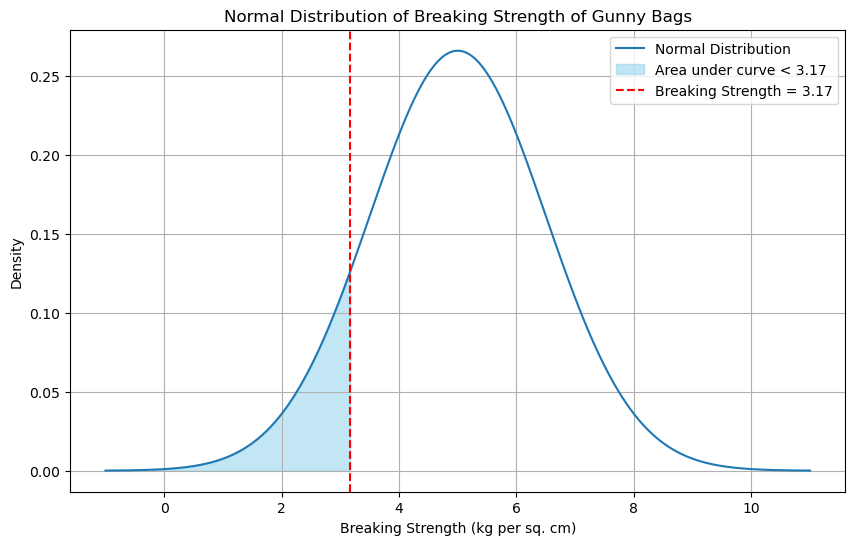

The proportion of gunny bags with breaking strength of less than 3.17 kg per sq. cm is 0.1112 or 11.12%.


In [7]:
# Given values
mu = 5          # mean breaking strength
sigma = 1.5     # standard deviation of breaking strength
threshold = 3.17 # value to find the proportion for

# Calculate z-score
z = (threshold - mu) / sigma

# Calculate cumulative probability
cumulative_prob = stats.norm.cdf(threshold, mu, sigma)

# Generate data for the normal distribution curve
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = stats.norm.pdf(x_values, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Normal Distribution')
plt.fill_between(x_values, y_values, where=(x_values < threshold), color='skyblue', alpha=0.5, label=f'Area under curve < {threshold}')
plt.axvline(threshold, color='red', linestyle='--', label=f'Breaking Strength = {threshold}')

# Additional plot details
plt.title('Normal Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Display the cumulative probability
print(f'The proportion of gunny bags with breaking strength of less than {threshold} kg per sq. cm is {cumulative_prob:.4f} or {cumulative_prob * 100:.2f}%.')

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

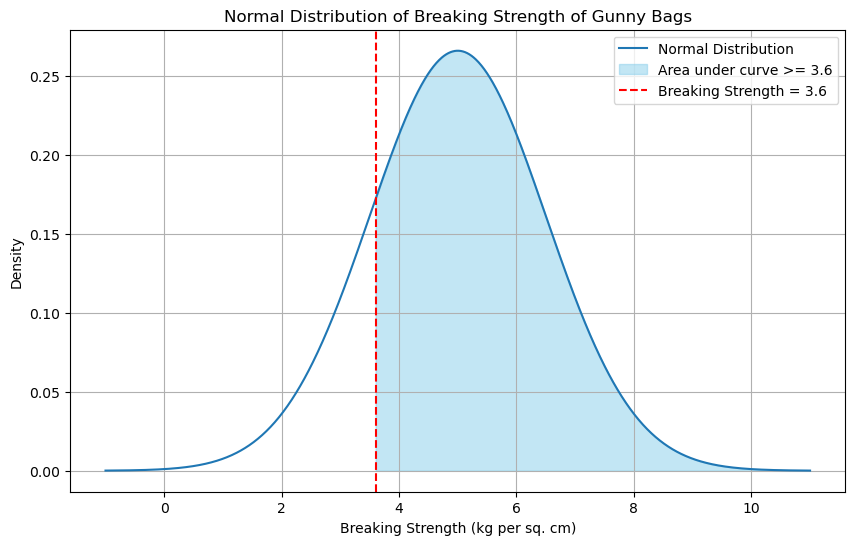

Proportion of gunny bags with breaking strength of at least 3.6 kg per sq. cm: 0.8247 or 82.47%.


In [8]:
# Given values
mu = 5  # mean
sigma = 1.5  # standard deviation
threshold = 3.6  # value to find the proportion for

# Calculate z-score
z = (threshold - mu) / sigma

# Calculate cumulative probability
cumulative_prob = stats.norm.cdf(threshold, mu, sigma)

# Calculate the complementary cumulative probability
probability_at_least = 1 - cumulative_prob

# Generate data for the normal distribution curve
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = stats.norm.pdf(x_values, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Normal Distribution')
plt.fill_between(x_values, y_values, where=(x_values >= threshold), color='skyblue', alpha=0.5, label=f'Area under curve >= {threshold}')
plt.axvline(threshold, color='red', linestyle='--', label=f'Breaking Strength = {threshold}')
plt.title('Normal Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

# Display the cumulative probability
print(f'Proportion of gunny bags with breaking strength of at least {threshold} kg per sq. cm: {probability_at_least:.4f} or {probability_at_least* 100:.2f}%.')

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

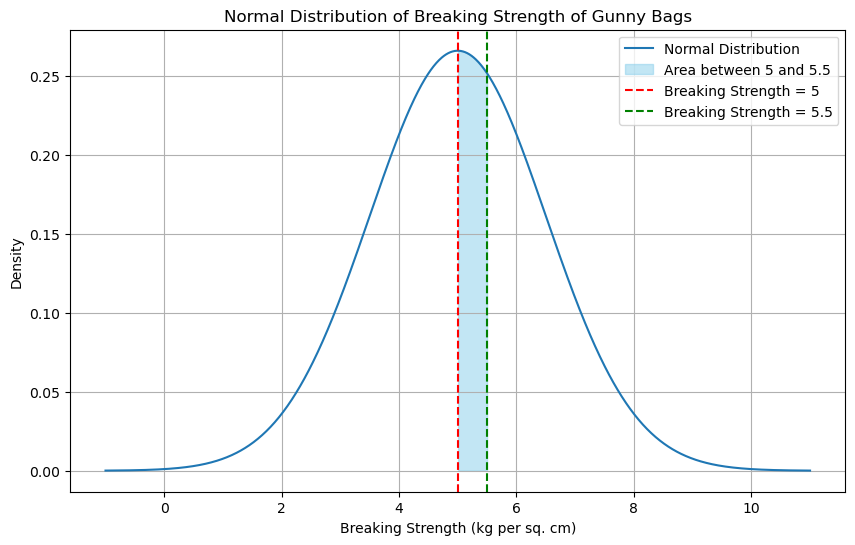

Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq. cm: 0.1306 or 13.06%.


In [9]:
# Given values
mu = 5  # mean
sigma = 1.5  # standard deviation
x1 = 5  # lower threshold
x2 = 5.5  # upper threshold

# Calculate z-scores
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

# Calculate cumulative probabilities
cumulative_prob_x1 = stats.norm.cdf(x1, mu, sigma)
cumulative_prob_x2 = stats.norm.cdf(x2, mu, sigma)

# Calculate the proportion between x1 and x2
proportion_between = cumulative_prob_x2 - cumulative_prob_x1


# Generate data for the normal distribution curve
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = stats.norm.pdf(x_values, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Normal Distribution')
plt.fill_between(x_values, y_values, where=((x_values >= x1) & (x_values <= x2)), color='skyblue', alpha=0.5, label=f'Area between {x1} and {x2}')
plt.axvline(x1, color='red', linestyle='--', label=f'Breaking Strength = {x1}')
plt.axvline(x2, color='green', linestyle='--', label=f'Breaking Strength = {x2}')
plt.title('Normal Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Display the proportion
print(f'Proportion of gunny bags with breaking strength between {x1} and {x2} kg per sq. cm: {proportion_between:.4f} or {proportion_between* 100:.2f}%.')

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

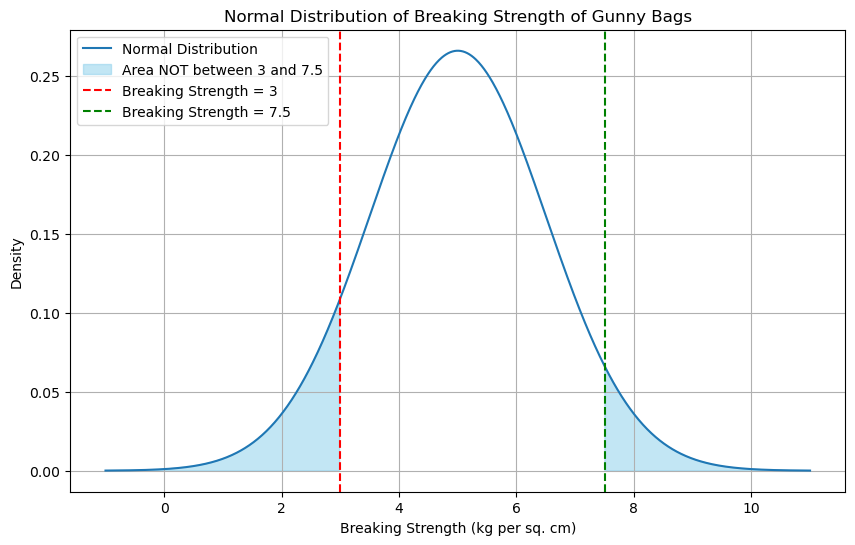

Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq. cm: 0.1390 or 13.90%.


In [10]:
# Given values
mu = 5  # mean
sigma = 1.5  # standard deviation
x1 = 3  # lower threshold
x2 = 7.5  # upper threshold

# Calculate z-scores
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

# Calculate cumulative probabilities
cumulative_prob_x1 = stats.norm.cdf(x1, mu, sigma)
cumulative_prob_x2 = stats.norm.cdf(x2, mu, sigma)

# Calculate the proportion between x1 and x2
proportion_between = cumulative_prob_x2 - cumulative_prob_x1

# Proportion of gunny bags with a breaking strength not between 3 and 7.5 kg per sq. cm
proportion_not_between = 1 - proportion_between

# Generate data for the normal distribution curve
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = stats.norm.pdf(x_values, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values,y_values, label='Normal Distribution')
plt.fill_between(x_values, y_values, where=((x_values < x1) | (x_values > x2)), color='skyblue', alpha=0.5, label=f'Area NOT between {x1} and {x2}')
plt.axvline(x1, color='red', linestyle='--', label=f'Breaking Strength = {x1}')
plt.axvline(x2, color='green', linestyle='--', label=f'Breaking Strength = {x2}')
plt.title('Normal Distribution of Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Display the proportion
print(f'Proportion of gunny bags with breaking strength NOT between {x1} and {x2} kg per sq. cm: {proportion_not_between:.4f} or {proportion_not_between* 100:.2f}%.')

## Problem 3
### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level)

In [11]:
# import the libraries
from scipy.stats import norm
from scipy.stats import   ttest_1samp , ttest_ind,t
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.stats.api as sm

In [12]:
df= pd.read_csv('Zingaro_Company.csv')

In [13]:
df.head()


,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [14]:
df.tail()

,Unpolished,Treated and Polished
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530
74,170.854823,144.502647


In [15]:
df.shape

(75, 2)

There are 75 rows and 2 columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


There are no missing values.

In [17]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


* Mean of unpolished stone is 134.11
* Mean of treated and  polished stone is 147.78
* Standard deviation of unpolished stone is 33.04
* Standard deviation of treated and polished stone is 15.58

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


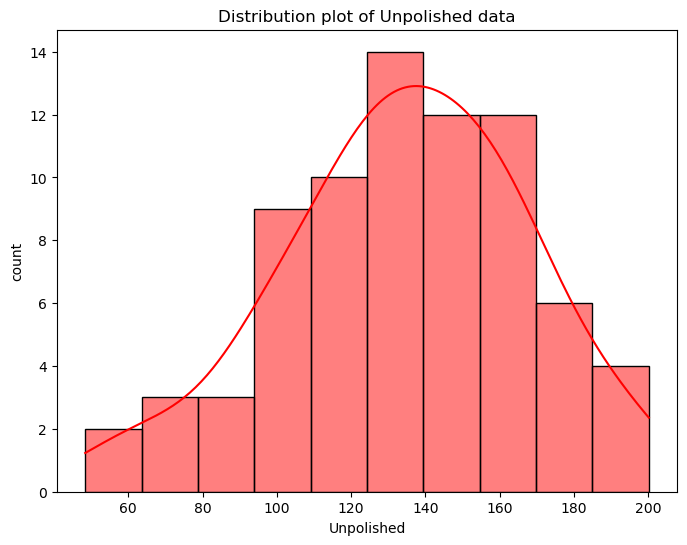

In [18]:
# Using seaborn's histplot for histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Unpolished '], kde=True, color='red', bins=10) 
plt.xlabel('Unpolished')
plt.ylabel('count')
plt.title('Distribution plot of Unpolished data')
plt.show()

Datas are normally distributed in unpolished plot

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


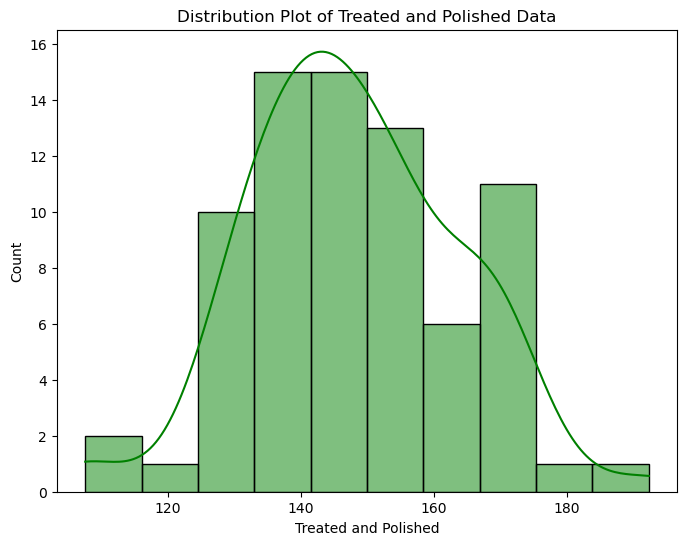

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Treated and Polished'], kde=True, color='green', bins=10)  # Using seaborn's histplot for histogram with KDE
plt.title('Distribution Plot of Treated and Polished Data')
plt.xlabel('Treated and Polished')
plt.ylabel('Count')
plt.show()

Distribution Plot of Treated and Polished Data shows norml distribution

#### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

Step 1: State the null and alternative hypotheses

H0=Mean Brinell’s hardness Index of unpolished stone surface is greater than or equal to 150.

Ha= Mean Brinell’s hardness Index of unpolished stone surface is less than 150.

OR

𝐻0 : 𝜇 => 150

𝐻𝐴 : 𝜇 < 150

Step 2: Decide the significance level Here we select 𝛼 = 0.05.


Step 3: Identify the test statistics:

In [20]:
print("The sample size for this problem is",len(df),'.')

The sample size for this problem is 75 .


 We do not know the population standard deviation although the sample size is more than 30 still we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic.

Step 4: Calculate the p - value and test statistics:

scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value. Here we will need answer in one tailed p value.

In [21]:
polished_hardness = df['Treated and Polished']

In [22]:
unpolished_hardness = df['Unpolished ']

In [23]:
# Perform one sample t-test
# population mean = 150
t_stat, p_value = ttest_1samp(unpolished_hardness , 150)

In [24]:
# One-tailed test: Divide the p-value by 2
p_value_one_tailed = p_value / 2

In [25]:
print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_value_one_tailed}")

T-statistic: -4.164629601426757
One-tailed P-value: 4.171286997419652e-05


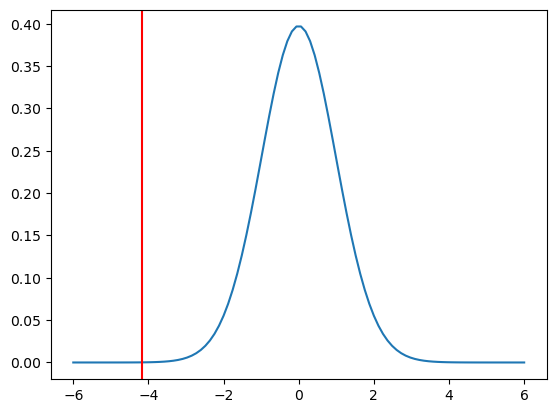

In [26]:
x = np.linspace(-6, 6, 100) # create an array of 100 numbers starting from -6 and ending at 6
plt.plot(x, t.pdf(x,df=len(df)-1)) # plot the pdf of the t distribution with n-1 degrees of freedom
plt.axvline(x=t_stat, color='r') # draw a vertical red line through the mentioned point # Use the calculated t_statistic directly
plt.show()

We can say that the,
* T - statistics of unpolished stone is -4.1646296
* P - value of unpolished stone is 4.17128700e-05

Step 5 Decide to reject or accept null hypothesis for the Level of significance: 0.05:
                                                 
* p value < Level of significance

* So the statistical decision is we reject the null hypothesis at 5% level of significance.
#### It means that there is sufficient evidence for Zingaro stone printing company to believe that unpolished stones are not suitable for printing, that is they have Brinell’s hardness index of less than 150.

#### 3.2 Is the mean hardness of the polished and unpolished stones the same?

step 1: State the null and alternate hypotheses
* Null Hypothesis (H0): The mean hardness of polished and unpolished stones are same. 
* Alternative Hypothesis (Ha): The mean hardness of polished and unpolished stones are different. 
OR

𝐻0 : 𝜇1  = μ2 

𝐻a : 𝜇1 ≠ μ2
 

Step 2: Decide the significance level Here we select 𝛼 = 0.05.

Step 3: Identify the test statistics:

* The two-sample t-test compares the means of two independent groups to determine if there is a statistically significant difference between them.
* It is suitable for comparing the means of two independent groups, especially when the population standard deviations are unknown.

In [27]:
polished_hardness = df['Treated and Polished']

In [28]:
unpolished_hardness = df['Unpolished ']

In [29]:
# Perform two-sample t-test for polished and unpolished stones
t_stat_two_sample, p_value_two_sample = stats.ttest_ind(polished_hardness, unpolished_hardness)

In [30]:
print(f"T-statistic: {t_stat_two_sample}")
print(f" P-value: {p_value_two_sample}")

T-statistic: 3.2422320501414053
 P-value: 0.0014655150194628353


We can say that the,

* T - statistics of unpolished stone is 3.2422320501414053
* P - value of unpolished stone is 0.0014655150194628353

Step 5 Decide to reject or accept null hypothesis for the Level of significance: 0.05:

* p value < Level of significance

* So the statistical decision is we reject the null hypothesis at 5% level of significance.
#### It means that,there is sufficient evidence for The mean hardness of polished and unpolished stones are different

## Problem 4
### Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

### UNDERSTANDING THE STRUCTURE OF DATA

In [31]:
df=pd.read_excel('Dental+Hardness+data (1).xlsx')

In [32]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [33]:
df.tail()

,Dentist,Method,Alloy,Temp,Response
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405
89,5,3,2,1700,312


In [34]:
df.shape

(90, 5)

### Check the types of the data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [36]:
# checking the missing values
df.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

### Checking the statistical analysis:

In [37]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


* Mean of Dentist is 3.
* Mean of method is 2.
* Mean of Alloy is 1.5.
* Mean of Temperature is 1600.
* Mean and median are same for Dentist,Method,Alloy and Temperature.

In [38]:
#checking for duplicate entries
df.duplicated().sum()

0

In [39]:
df['Dentist'].value_counts()

Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64

There are 5 Dentist. Each has same number of count values 18.

In [40]:
df['Method'].value_counts()

Method
1    30
2    30
3    30
Name: count, dtype: int64

There are 3 methods.Each method has same  number of counts 30. 

In [41]:
df['Alloy'].value_counts()

Alloy
1    45
2    45
Name: count, dtype: int64

There are 2 alloys which have same count values 45.

In [42]:
df['Temp'].value_counts()

Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64

There are 3 different temperature which have same number of count value 30.

In [43]:
df['Response'].value_counts()

Response
743     6
792     6
813     5
835     5
715     5
824     4
752     3
681     3
870     3
772     3
698     3
782     3
858     3
762     2
707     2
312     2
405     2
933     2
882     2
907     2
847     2
665     2
803     2
690     1
483     1
421     1
1048    1
289     1
1115    1
493     1
894     1
649     1
613     1
724     1
620     1
627     1
734     1
673     1
560     1
585     1
536     1
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)
### Univariate Analysis
#### Explore all the variables and provide observations on their distributions.

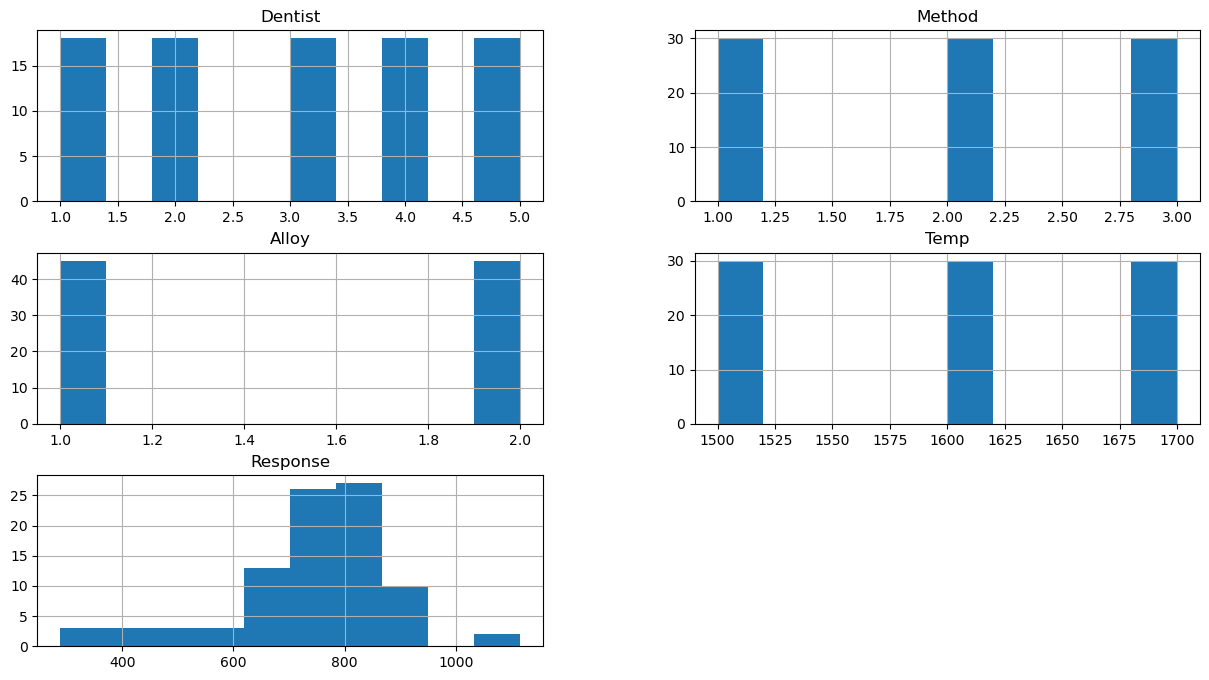

In [44]:
#Checking normality of distribution. 
df.hist(figsize=(15,8))
plt.show()

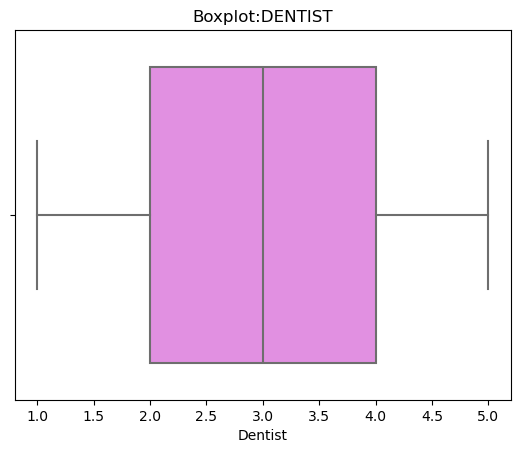

In [45]:
# creating a boxplot with seaborn
plt.title('Boxplot:DENTIST')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='Dentist',color = 'violet');

This shows the datas are uniformly distributed.

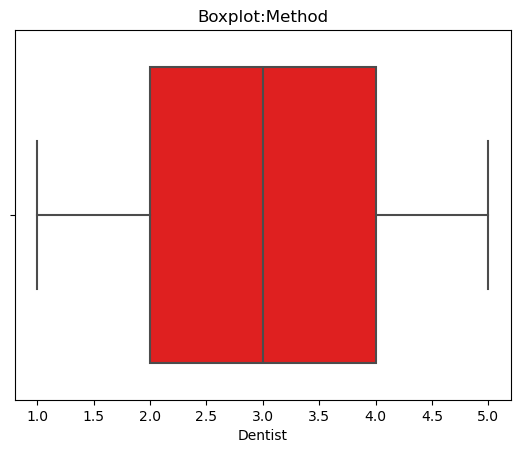

In [46]:
# creating a boxplot with seaborn
plt.title('Boxplot:Method')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='Dentist',color = 'Red');

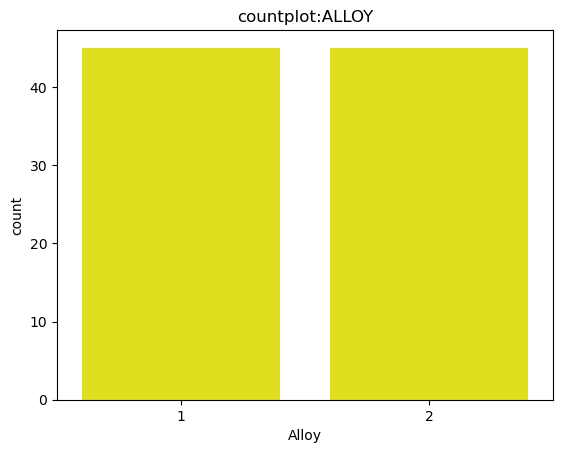

In [47]:
# creating a boxplot with seaborn
plt.title('countplot:ALLOY')
sns.axes_style('whitegrid')
sns.countplot(data=df, x='Alloy',color = 'yellow');

This shows the uniform distribution of data.

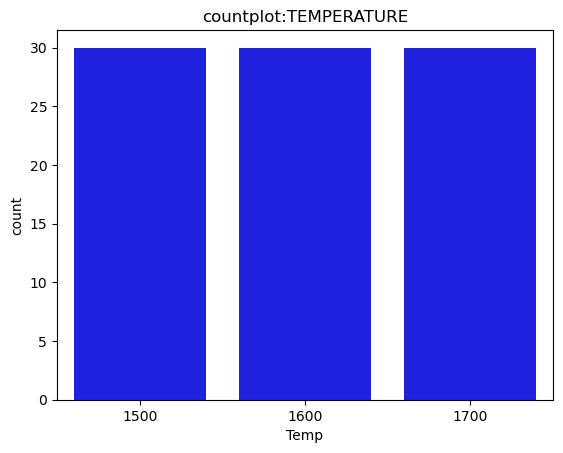

In [48]:
# creating a boxplot with seaborn
plt.title('countplot:TEMPERATURE')
sns.axes_style('whitegrid')
sns.countplot(data=df, x='Temp',color = 'blue');

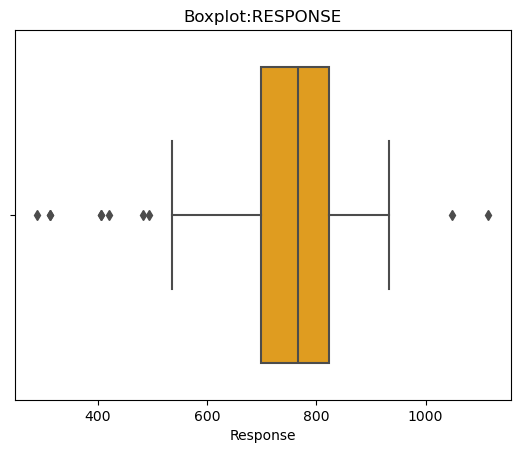

In [49]:
# creating a boxplot with seaborn
plt.title('Boxplot:RESPONSE')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='Response',color = 'orange');

* Outliers are seen in response.
* The median is closer to the right end of the box and the whisker is shorter on the right end of the box. 
* From the above plot, we can see that the distribution of Response is skewed left.

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


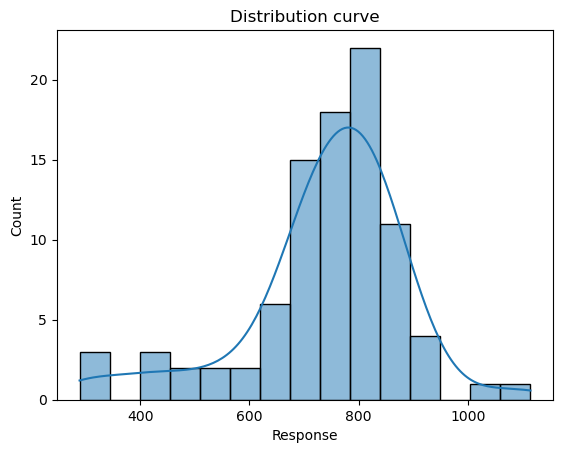

In [50]:
sns.histplot(df['Response'], kde=True)
plt.title('Distribution curve')
plt.show()

Response is almost normally distributed with some skewness.

## 4.1 How does the hardness of implants vary depending on dentists?

### Hypothesis Testing

## Hypothesis - 1

### For Alloy 1 :

### Step 1: Define null and alternative hypotheses for One-Way ANOVA

### Step 2: Select Appropriate test

In [51]:
Dentist_1 = df[(df['Dentist'] == 1) & (df['Alloy'] == 1)]
Dentist_2 = df[(df['Dentist'] == 2) & (df['Alloy'] == 1)]
Dentist_3 = df[(df['Dentist'] == 3) & (df['Alloy'] == 1)]
Dentist_4 = df[(df['Dentist'] == 4) & (df['Alloy'] == 1)]
Dentist_5 = df[(df['Dentist'] == 5) & (df['Alloy'] == 1)]

In [52]:
responses_Dentist_1 = Dentist_1['Response'].values
responses_Dentist_2 = Dentist_2['Response'].values
responses_Dentist_3 = Dentist_3['Response'].values
responses_Dentist_4 = Dentist_4['Response'].values
responses_Dentist_5 = Dentist_5['Response'].values

In [53]:
# Concatenate all responses for Alloy 1 (A1)
all_responses_A1 = np.concatenate([responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5])

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(all_responses_A1)

print(f"Shapiro-Wilk Test for Alloy 1 (A1) - Normality:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test for Alloy 1 (A1) - Normality:
Test Statistic: 0.8304629921913147
P-value: 1.1945070582441986e-05


Since p-value of the test is lesser than the 5% significance level, we reject the null hypothesis that the response doesnot follows the normal distribution.

In [54]:
# Assumption 2: Homogeneity of Variance
# Perform Levene's test for equality of variances
statistic, p_value = stats.levene(responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5)

print(f"Levene's Test for Alloy 1 (A1) - Equality of Variances:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Levene's Test for Alloy 1 (A1) - Equality of Variances:
Test Statistic: 1.3847146992797106
P-value: 0.2565537418543795


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select alpha = 0.05 

### Step 4: Calculate the p-value

* We will use the f_oneway() function from the scipy.stats library to perform a one-way ANOVA test.
* The f_oneway() function takes the sample observations from the different groups and returns the test statistic and the p-value for the test.

In [55]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5)
print('The p-value is ', (p_value,))

The p-value is  (0.11656712140267628,)


### Step 5: Compare the p-value with alpha= 0.05


In [56]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.11656712140267628 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Draw inference
Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean hardness of dental implants is the same across all dentists for alloy 1.

## For Alloy 2:

### Step 1: Define null and alternative hypotheses for One-Way ANOVA


### Step 2: Select Appropriate test

This is a problem, concerning more than two factors. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

One-way ANOVA test

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

In [57]:
Dentist_1 = df[(df['Dentist'] == 1) & (df['Alloy'] == 2)]
Dentist_2 = df[(df['Dentist'] == 2) & (df['Alloy'] == 2)]
Dentist_3 = df[(df['Dentist'] == 3) & (df['Alloy'] == 2)]
Dentist_4 = df[(df['Dentist'] == 4) & (df['Alloy'] == 2)]
Dentist_5 = df[(df['Dentist'] == 5) & (df['Alloy'] == 2)]

In [58]:
responses_Dentist_1 = Dentist_1['Response'].values
responses_Dentist_2 = Dentist_2['Response'].values
responses_Dentist_3 = Dentist_3['Response'].values
responses_Dentist_4 = Dentist_4['Response'].values
responses_Dentist_5 = Dentist_5['Response'].values

In [59]:
# Concatenate all responses for Alloy 2 (A2)
all_responses_A2 = np.concatenate([responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5])

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(all_responses_A2)

print(f"Shapiro-Wilk Test for Alloy 2 (A2) - Normality:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test for Alloy 2 (A2) - Normality:
Test Statistic: 0.887769341468811
P-value: 0.00040293222991749644


Since p-value of the test is lesser than the 5% significance level, we reject the null hypothesis that the response do not follows the normal distribution.

In [60]:
# Assumption 2: Homogeneity of Variance
# Perform Levene's test for equality of variances
statistic, p_value = stats.levene(responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5)

print(f"Levene's Test for Alloy 2 (A2) - Equality of Variances:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {round(p_value,2)}")

Levene's Test for Alloy 2 (A2) - Equality of Variances:
Test Statistic: 1.4456166464566966
P-value: 0.24


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select alpha = 0.05

### Step 4: Calculate the p-value

In [61]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(responses_Dentist_1, responses_Dentist_2, responses_Dentist_3, responses_Dentist_4, responses_Dentist_5)
print('The p-value is ', round(p_value,2))

The p-value is  0.72


### Step 5: Compare the p-value with alpha= 0.05

In [62]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7180309510793431 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Draw inference
P-value is 0.72which is very greater than alpha i.e., 0.05. Hence, we Fail to reject null hypothesisand consider there is no difference in means among the dentists in terms of implant hardness for Alloy 2

C:\Users\Benita Merlin E\AppData\Local\Temp\ipykernel_14056\2166187002.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', data=df, hue='Alloy', ci=None)


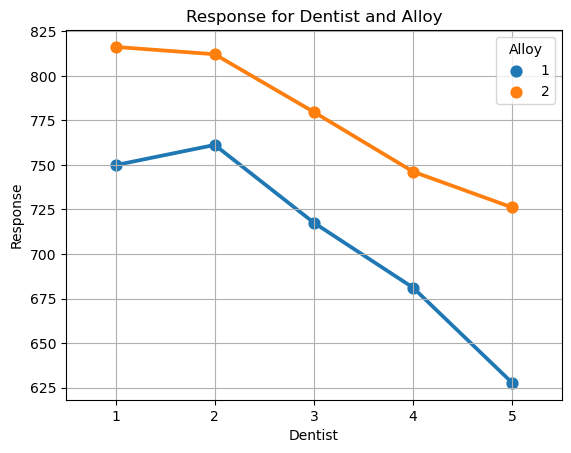

In [63]:
sns.pointplot(x='Dentist', y='Response', data=df, hue='Alloy', ci=None)
plt.title('Response for Dentist and Alloy')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.grid(True)


## 4.2 How does the hardness of implants vary depending on methods?

### For Alloy 1:

### Step 1. State the Null and Alternate Hypotheses 

### Step 2: Select Appropriate test
This is a problem, concerning more than two factors. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

One-way ANOVA test

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

In [64]:
Method_1 = df[(df['Method'] == 1) & (df['Alloy'] == 1)]
Method_2 = df[(df['Method'] == 2) & (df['Alloy'] == 1)]
Method_3 = df[(df['Method'] == 3) & (df['Alloy'] == 1)]

In [65]:
responses_Method_1 = Method_1['Response'].values
responses_Method_2 = Method_2['Response'].values
responses_Method_3 = Method_3['Response'].values

In [66]:
# Concatenate all responses for Alloy 1 (A1)
all_responses_A1 = np.concatenate([responses_Method_1, responses_Method_2, responses_Method_3])

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(all_responses_A1)

print(f"Shapiro-Wilk Test for Alloy 1 (A1) - Normality:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test for Alloy 1 (A1) - Normality:
Test Statistic: 0.8304629921913147
P-value: 1.1945070582441986e-05


In [67]:
# # Assumption 2: Homogeneity of Variance
# Perform Levene's test for equality of variances
statistic, p_value = stats.levene(responses_Method_1, responses_Method_2, responses_Method_3)

print(f"Levene's Test for Alloy 1 (A1) - Equality of Variances:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Levene's Test for Alloy 1 (A1) - Equality of Variances:
Test Statistic: 6.52140454403598
P-value: 0.0034160381460233975


### Step 3: Decide the significance level
As given in the problem statement, we select alpha = 0.05



### Step 4: Calculate the p-value

In [68]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define a function to perform the analysis for a given alloy
def analyze_hardness_by_method(df, alloy_type):
    # Filter the data for the specified alloy
    df_alloy = df[df['Alloy'] == alloy_type]

    # Fit the OLS model
    model = ols('Response ~ C(Method)', data=df_alloy).fit()

    # Perform ANOVA
    anova_results = sm.stats.anova_lm(model, typ=2)
    
    # Print the ANOVA results
    print(f"\nANOVA Results for Alloy {alloy_type}:")
    print(anova_results)
    
    # Return the model and results for further analysis if needed
    return model, anova_results

# Perform analysis for Alloy 1
model_alloy1, anova_results_alloy1 = analyze_hardness_by_method(df, 1)



ANOVA Results for Alloy 1:
                  sum_sq    df         F    PR(>F)
C(Method)  148472.177778   2.0  6.263327  0.004163
Residual   497805.066667  42.0       NaN       NaN


### Step 5: Compare the p-value with alpha= 0.05

### Step 6: Draw inference
Since the p-value is lesser than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean hardness of dental implants is different across all method for alloy 1.

## For alloy 2

### Step 2: Select Appropriate test
This is a problem, concerning more than two factors. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

One-way ANOVA test

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.



In [69]:
Method_1 = df[(df['Dentist'] == 1) & (df['Alloy'] == 2)]
Method_2 = df[(df['Dentist'] == 2) & (df['Alloy'] == 2)]
Method_3 = df[(df['Dentist'] == 3) & (df['Alloy'] == 2)]

In [70]:
responses_Method_1 = Method_1['Response'].values
responses_Method_2 = Method_2['Response'].values
responses_Method_3 = Method_3['Response'].values

In [71]:
# Concatenate all responses for Alloy 2 (A2)
all_responses_A2 = np.concatenate([responses_Method_1, responses_Method_2, responses_Method_3])

# Perform Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(all_responses_A2)

print(f"Shapiro-Wilk Test for Alloy 2 (A2) - Normality:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test for Alloy 2 (A2) - Normality:
Test Statistic: 0.953279435634613
P-value: 0.25722309947013855


Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

In [72]:
## Assumption 2: Homogeneity of Variance
# Perform Levene's test for equality of variances
statistic, p_value = stats.levene(responses_Method_1, responses_Method_2, responses_Method_3)

print(f"Levene's Test for Alloy 2 (A1) - Equality of Variances:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Levene's Test for Alloy 2 (A1) - Equality of Variances:
Test Statistic: 1.1314570586352275
P-value: 0.33917195814890017


### Step 3: Decide the significance level
As given in the problem statement, we select alpha = 0.05



### Step 4: Calculate the p-value

In [73]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define a function to perform the analysis for a given alloy
def analyze_hardness_by_method(df, alloy_type):
    # Filter the data for the specified alloy
    df_alloy = df[df['Alloy'] == alloy_type]

    # Fit the OLS model
    model = ols('Response ~ C(Method)', data=df_alloy).fit()

    # Perform ANOVA
    anova_results = sm.stats.anova_lm(model, typ=2)
    
    # Print the ANOVA results
    print(f"\nANOVA Results for Alloy {alloy_type}:")
    print(anova_results)
    
    # Return the model and results for further analysis if needed
    return model, anova_results

# Perform analysis for Alloy 2
model_alloy2, anova_results_alloy2 = analyze_hardness_by_method(df, 2)



ANOVA Results for Alloy 2:
             sum_sq    df        F    PR(>F)
C(Method)  499640.4   2.0  16.4108  0.000005
Residual   639362.4  42.0      NaN       NaN


### Step 5: Compare the p-value with alpha= 0.05


p value is less than the level of significance, we reject the null hypothesis.


### Step 6: Draw inference
Since the p-value is lesser than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean hardness of dental implants is different across all method for alloy 2.

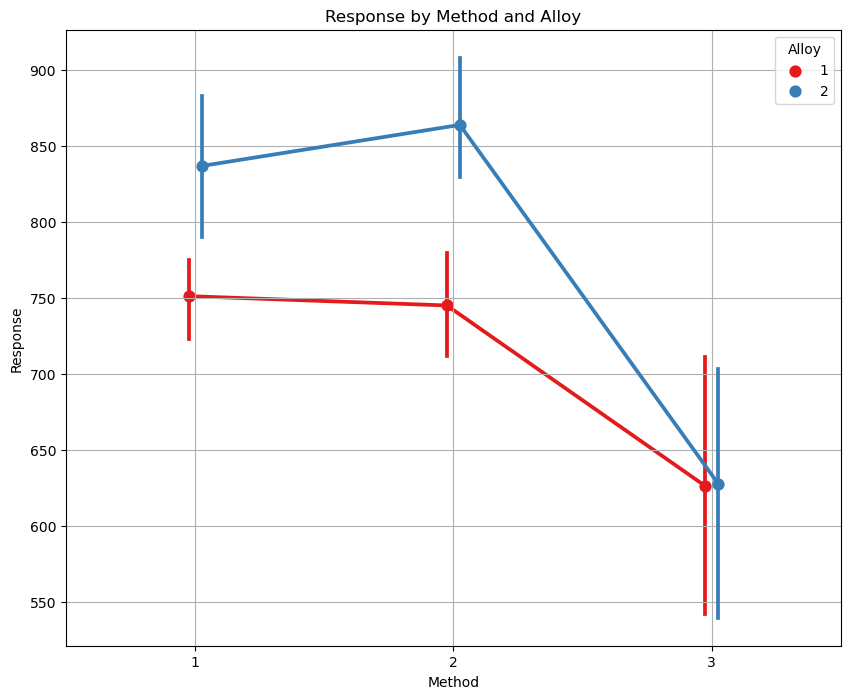

In [74]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='Method', y='Response', hue='Alloy', data=df, dodge=True, palette='Set1')
plt.title('Response by Method and Alloy')
plt.xlabel('Method')
plt.ylabel('Response')
plt.grid(True)

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# For demonstration purposes, performing Tukey's HSD on the example data
mc = MultiComparison(df['Response'], df['Method'])
result = mc.tukeyhsd()

print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   10.4333 0.9415  -64.7584   85.6251  False
     1      3    -166.8    0.0 -241.9917  -91.6083   True
     2      3 -177.2333    0.0 -252.4251 -102.0416   True
---------------------------------------------------------


## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

### Step 1: Define null and alternative hypotheses for Two-Way ANOVA

### Step 2: Select Appropriate test

### Step 3: Decide the significance level
As given in the problem statement, we select alpha =0.05

### Step 4: Check for Interaction Effect

We will now analyse the effect of both the dentist and method on the Alloy 1.

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001D6D9F099E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


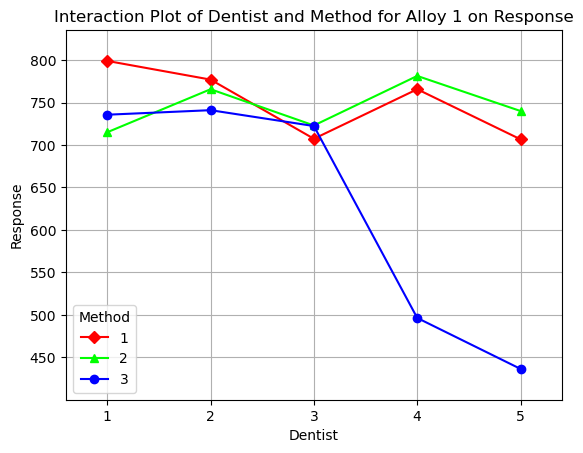

In [76]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Separate data for Alloy 1 
df_alloy1 = df[df['Alloy'] == 1]

# Plotting interaction plot for Alloy 1
interaction_plot(df_alloy1['Dentist'], df_alloy1['Method'], df_alloy1['Response'], markers=['D', '^', 'o'])
plt.title('Interaction Plot of Dentist and Method for Alloy 1 on Response')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.grid(True)
plt.show()


We can see that there is an interaction between the Dentist and Method for alloy 1 on Response.

### Step 5: Calculate the p-value

In [77]:
formula = 'Response ~ C(Dentist):C(Method)'
model = ols(formula, data=df_alloy1).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist):C(Method),14.0,441097.244444,31506.946032,4.606728,0.000221
Residual,30.0,205180.000000,6839.333333,NaN,NaN


### Step 6: Compare the p-value with alpha

### Step 7: Draw inference

•P-value is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesis and consider there is a difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardness for Alloy 1. 

## We will now analyse the effect of both the dentist and method on the Alloy 2

### Step 1: Define null and alternative hypotheses for Two-Way ANOVA

The null and alternative hypotheses can be formulated as:

(𝐻0) : The effect of dentist on the hardness of dental implants for alloy 2 does not depend on the effect of the method variable (a.k.a. no interaction effect)

(𝐻𝑎) : There is an interaction effect between dentist and method on alloy 2.

### Step 2: Select Appropriate test

### Step 3: Decide the significance level
As given in the problem statement, we select alpha =0.05

### Step 4: Check for Interaction Effect
We will now analyse the effect of both the dentist and method on the Alloy 2.

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001D6D9F099E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


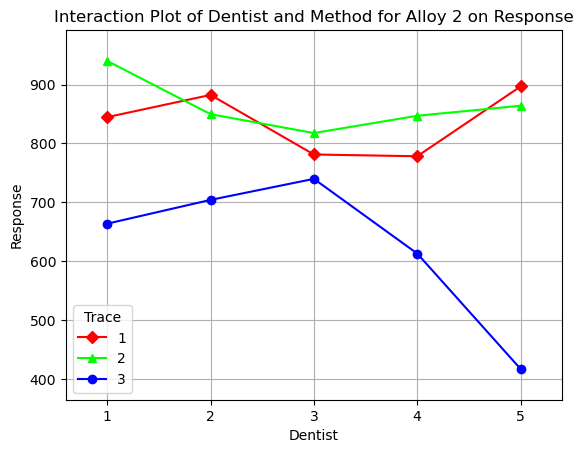

In [78]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Separate data for Alloy 2 
df_alloy2 = df[df['Alloy'] == 2]

# Convert 'Dentist' and 'Method' columns to array-like objects
dentist_values = df_alloy2['Dentist'].values
method_values = df_alloy2['Method'].values

# Plotting interaction plot for Alloy 2
interaction_plot(dentist_values, method_values, df_alloy2['Response'], markers=['D', '^', 'o']) 
plt.title('Interaction Plot of Dentist and Method for Alloy 2 on Response')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.grid(True)
plt.show()

* There is some sort of interaction between method and dentist.
* No interaction among Response.

### Step 5: Calculate the p-value

In [79]:
formula = 'Response ~ C(Dentist):C(Method)'
model = ols(formula, data=df_alloy2).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist):C(Method),14.0,753898.133333,53849.866667,4.194953,0.000482
Residual,30.0,385104.666667,12836.822222,NaN,NaN


### Step 6: Compare the p-value with alpha

 p-value is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

P-value is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesis and consider there is  difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardness for Alloy 2.That is,there is an interaction upon response.

## 4.4 How does the hardness of implants vary depending on dentists and methods together?

### Hypothesis Test for Alloy 1 

### Step 1: Define null and alternative hypotheses for Two-Way ANOVA
The null and alternative hypotheses can be formulated as:

(𝐻0) : The effect of dentist on the hardness of dental implants for alloy 1 does not depend on the effect of the method variable (a.k.a. no interaction effect)

(𝐻𝑎) : There is an interaction effect between dentist and method on alloy 1.

### Step 2: Select Appropriate test


### Step 3: Decide the significance level
As given in the problem statement, we select alpha =0.05

### Step 4: Calculate the p_value


In [80]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_alloy1 = df[df['Alloy'] == 1]

# Fit the ANOVA model for Alloy 1
formula_alloy1 = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model_alloy1 = ols(formula_alloy1, df[df['Alloy'] == 1]).fit()

# Perform ANOVA for Alloy 1
aov_table_alloy1 = anova_lm(model_alloy1, typ=2)

# Print ANOVA table for Alloy 1
print("ANOVA Table for Alloy 1:")
print(aov_table_alloy1)

# Extract interaction p-value for Alloy 1
interaction_pval_alloy1 = aov_table_alloy1.loc['C(Dentist):C(Method)', 'PR(>F)']
print(f"\nP-value for Interaction (Alloy 1): {interaction_pval_alloy1}")

ANOVA Table for Alloy 1:
                             sum_sq    df          F    PR(>F)
C(Dentist)            106683.688889   4.0   3.899638  0.011484
C(Method)             148472.177778   2.0  10.854287  0.000284
C(Dentist):C(Method)  185941.377778   8.0   3.398383  0.006793
Residual              205180.000000  30.0        NaN       NaN

P-value for Interaction (Alloy 1): 0.006792747204237292


### Step 5: Compare the p-value with alpha


### Step 7: Draw inference
•P-value is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesis and consider there is a difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardness for Alloy 1.

## TUKEY HSD TEST :

In [85]:
# Ensure Dentist and Method are strings
df_alloy1['Dentist'] = df_alloy1['Dentist'].astype(str)
df_alloy1['Method'] = df_alloy1['Method'].astype(str)

# If the interaction term is significant, perform Tukey's HSD test
if interaction_pval_alloy1 < 0.05:
    # Create an interaction term for Tukey's HSD test
    df_alloy1['Dentist_Method'] = df_alloy1['Dentist'] + ":" + df_alloy1['Method']
    
    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=df_alloy1['Response'], groups=df_alloy1['Dentist_Method'], alpha=0.05)
    
    # Print Tukey's HSD test results
    print("\nTukey's HSD Test Results:")
    print(tukey)
else:
    print("\nInteraction is not significant, so Tukey's HSD test is not performed.")

C:\Users\Benita Merlin E\AppData\Local\Temp\ipykernel_14056\1007312999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alloy1['Dentist'] = df_alloy1['Dentist'].astype(str)
C:\Users\Benita Merlin E\AppData\Local\Temp\ipykernel_14056\1007312999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alloy1['Method'] = df_alloy1['Method'].astype(str)
C:\Users\Benita Merlin E\AppData\Local\Temp\ipykernel_14056\1007312999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 


Tukey's HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   1:1    1:2     -84.0 0.9933 -332.8283  164.8283  False
   1:1    1:3  -63.3333 0.9996 -312.1617   185.495  False
   1:1    2:1     -22.0    1.0 -270.8283  226.8283  False
   1:1    2:2  -33.3333    1.0 -282.1617   215.495  False
   1:1    2:3     -58.0 0.9999 -306.8283  190.8283  False
   1:1    3:1  -91.6667 0.9853  -340.495  157.1617  False
   1:1    3:2     -76.0 0.9975 -324.8283  172.8283  False
   1:1    3:3  -76.6667 0.9972  -325.495  172.1617  False
   1:1    4:1  -33.3333    1.0 -282.1617   215.495  False
   1:1    4:2  -17.6667    1.0  -266.495  231.1617  False
   1:1    4:3 -302.6667  0.007  -551.495  -53.8383   True
   1:1    5:1  -92.3333 0.9844 -341.1617   156.495  False
   1:1    5:2     -59.0 0.9998 -307.8283  189.8283  False
   1:1    5:3 -362.6667 0.0007  -611.495 -113

## Hypothesis Test for Alloy 2

### Step 1: Define null and alternative hypotheses for Two-Way ANOVA
The null and alternative hypotheses can be formulated as:

(𝐻0) : The effect of dentist on the hardness of dental implants for alloy 2 does not depend on the effect of the method variable (a.k.a. no interaction effect)

(𝐻𝑎) : There is an interaction effect between dentist and method on alloy 2.

### Step 2: Select Appropriate test

### Step 3: Decide the significance level
As given in the problem statement, we select alpha =0.05

### Step 4: Calculate the p_value


In [81]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_alloy2 = df[df['Alloy'] == 2]

# Fit the ANOVA model for Alloy 2
formula_alloy2 = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model_alloy2 = ols(formula_alloy2, df[df['Alloy'] == 2]).fit()

# Perform ANOVA for Alloy 2
aov_table_alloy2 = anova_lm(model_alloy2, typ=2)

# Print ANOVA table for Alloy 2
print("ANOVA Table for Alloy 2:")
print(aov_table_alloy2)

# Extract interaction p-value for Alloy 2
interaction_pval_alloy2 = aov_table_alloy2.loc['C(Dentist):C(Method)', 'PR(>F)']
print(f"\nP-value for Interaction (Alloy 2): {interaction_pval_alloy2}")

ANOVA Table for Alloy 2:
                             sum_sq    df          F    PR(>F)
C(Dentist)             56797.911111   4.0   1.106152  0.371833
C(Method)             499640.400000   2.0  19.461218  0.000004
C(Dentist):C(Method)  197459.822222   8.0   1.922787  0.093234
Residual              385104.666667  30.0        NaN       NaN

P-value for Interaction (Alloy 2): 0.09323403966149585


### Step 5: Compare the p-value with alpha = 0.05



P value for Method is 0.000004, which is only less than 0.05 when compared to Dentist (0.371833) and Interaction variable - Dentist : Method (0.093234). So we have enough evidence to reject null hypothesis stating that at least one of the pair means is different for Alloy 2.

### Draw Inference

P-value is lesser than alpha i.e., 0.05. Hence, we have enough evidence to reject null hypothesis and consider there is a difference in means among the Interaction effect between Dentist and Method levels in terms of implant hardness for Alloy 2.

### TUKEY HSD TEST FOR ALLOY 2

In [86]:
# Extract interaction p-value for Alloy 2
interaction_pval_alloy2 = aov_table_alloy2.loc['C(Dentist):C(Method)', 'PR(>F)']
print(f"\nP-value for Interaction (Alloy 2): {interaction_pval_alloy2}")

# If the interaction term is significant, perform Tukey's HSD test
if interaction_pval_alloy2 < 0.05:
    # Create an interaction term for Tukey's HSD test
    df_alloy2['Dentist_Method'] = df_alloy2['Dentist'] + ":" + df_alloy2['Method']
    
    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=df_alloy2['Response'], groups=df_alloy2['Dentist_Method'], alpha=0.05)
    
    # Print Tukey's HSD test results
    print("\nTukey's HSD Test Results:")
    print(tukey)
else:
    print("\nInteraction is not significant, so Tukey's HSD test is not performed.")


P-value for Interaction (Alloy 2): 0.09323403966149585

Interaction is not significant, so Tukey's HSD test is not performed.
